In [28]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
plt.rcParams['font.family'] = 'Arial'

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Windows-11\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Dec 17 11:13:25 2024).


<Axes: xlabel='job_title_short'>

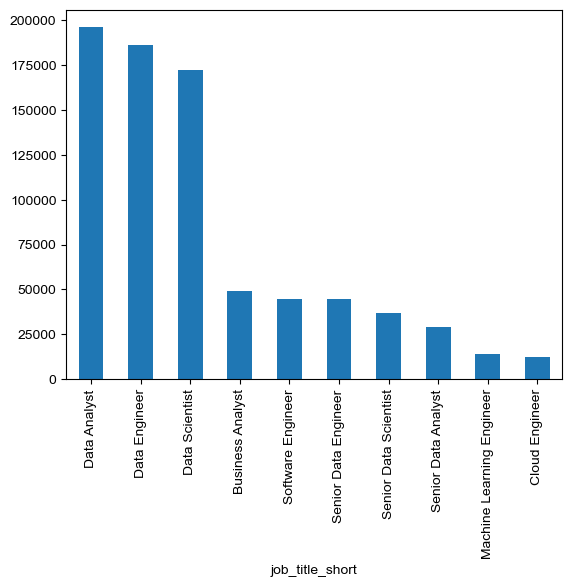

In [29]:
fig, ax = plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

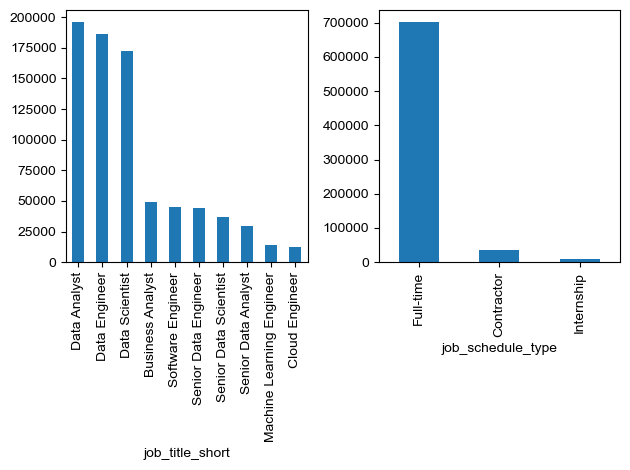

In [30]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().sort_values(ascending=False).plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
fig.tight_layout()

In [31]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

0 ['Data Scientist', 'Data Engineer', 'Data Analyst']
1 ['Data Scientist', 'Data Engineer', 'Data Analyst']
2 ['Data Scientist', 'Data Engineer', 'Data Analyst']


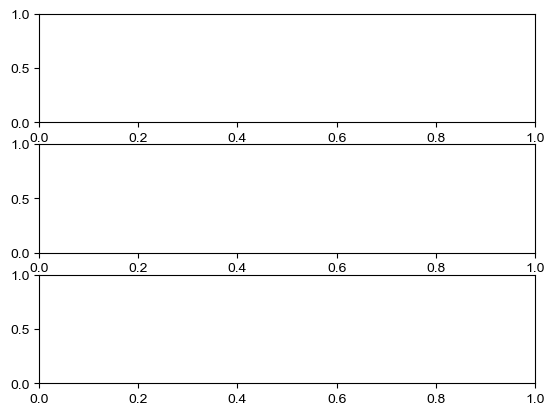

In [32]:
fig, ax = plt.subplots(3,1)
for i, job_title in enumerate(job_titles):
    print(i, job_titles)

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


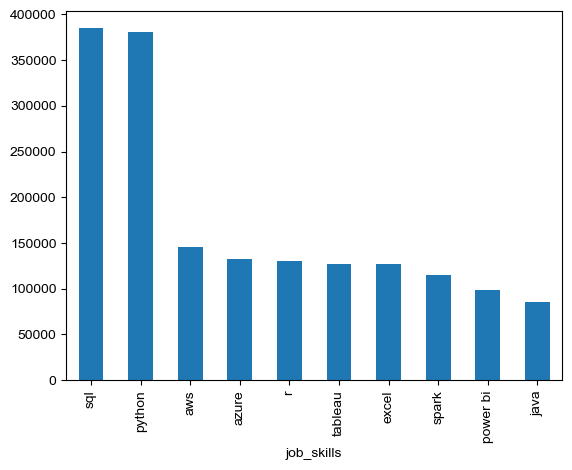

In [33]:
df_exploed = df.explode('job_skills')
df_exploed['job_skills'].value_counts().head(10).plot(kind='bar')
skills_count = df_exploed.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

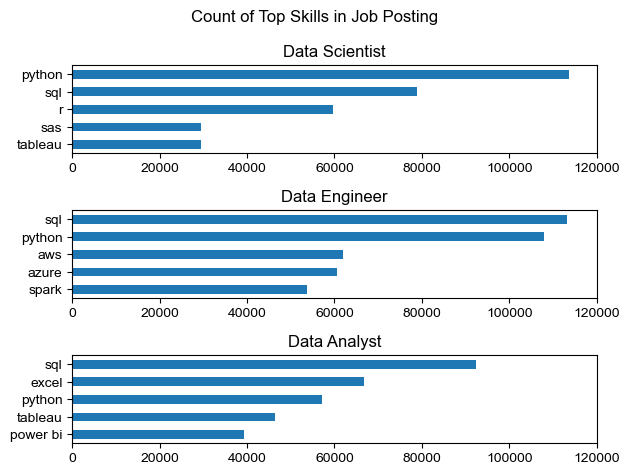

In [52]:
# প্রতিটি job_title এর জন্য গ্রাফ আঁকুন
fig, ax = plt.subplots(3,1)
for i, job_title in enumerate(job_titles):
    # job_title এর জন্য ডেটা ফিল্টার করা
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title]
    
    # চেক করুন যে df_plot খালি নয়
    if not df_plot.empty:
        df_plot = df_plot.head(5)  # প্রথম ৫টি সারি নির্বাচন
        df_plot.plot(kind='barh', x= 'job_skills', y='skill_count', ax=ax[i], title=job_title)
        ax[i].invert_yaxis()
        ax[i].set_ylabel('')
        ax[i].legend().set_visible(False)
        ax[i].set_xlim(0, 120000)
    else:
        print(f"Warning: No data found for {job_title}")
fig.suptitle('Count of Top Skills in Job Posting')
plt.tight_layout()  # গ্রাফগুলিকে সুন্দরভাবে সাজানো
plt.show()